# Pneumonia Detection

In [3]:
import torch
import torchvision
import tensorflow as tf
import os
import numpy as np
import pandas as pd
import cv2
import cv2
from sklearn.metrics import confusion_matrix, roc_curve,auc, classification_report, precision_score, recall_score
import matplotlib.pyplot as plt
import torchvision.transforms as transforms

In [4]:
labels = ['Healthy', 'Bacterial', 'Viral']
img_size = 150
def get_data(data_dir):
    data = []
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size))     # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [5]:
transform = transforms.Compose(
    [transforms.Resize(224),
     transforms.CenterCrop(224),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [6]:
healthy = os.listdir('../Dataset/masked/COVID-19_Radiography_Dataset/Healthy/images')
healthy_dir = '../Dataset/masked/COVID-19_Radiography_Dataset/Healthy/images'

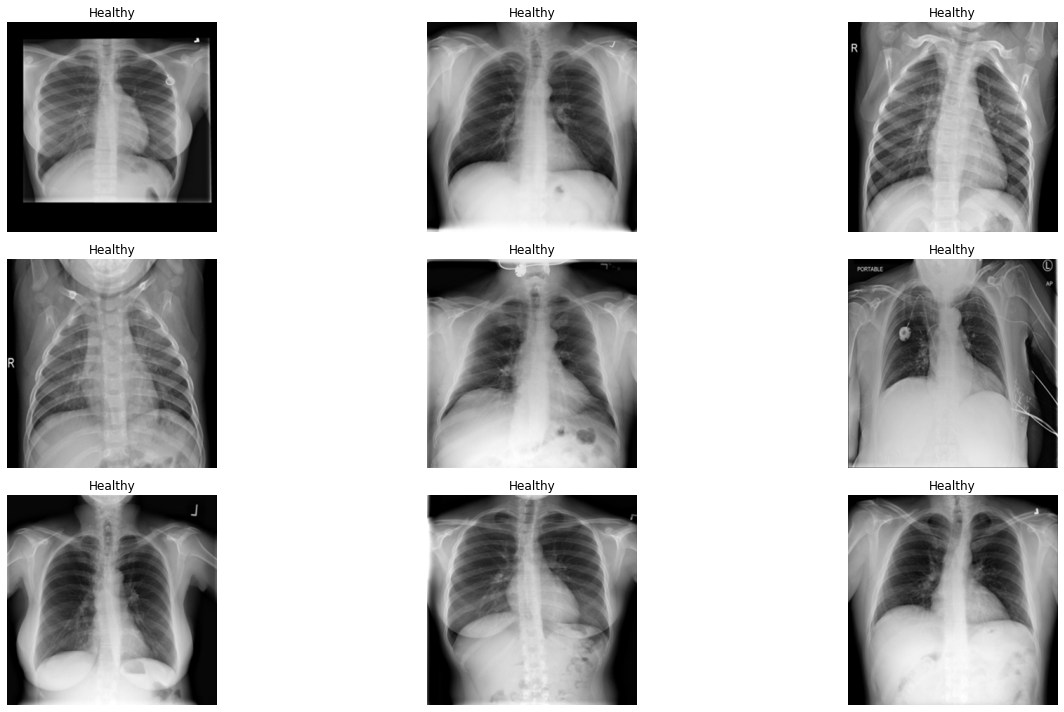

In [7]:
plt.figure(figsize = (20,10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(healthy_dir, healthy[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title("Healthy")
plt.tight_layout()

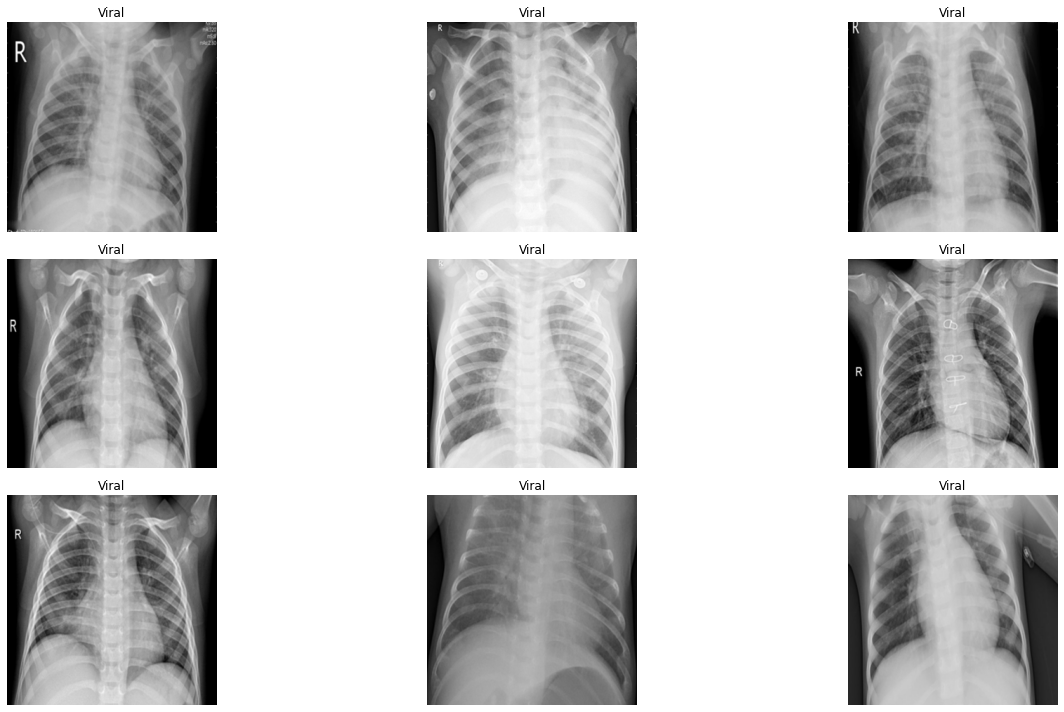

In [8]:
viral = os.listdir('../Dataset/masked/COVID-19_Radiography_Dataset/Viral/images')
viral_dir = '../Dataset/masked/COVID-19_Radiography_Dataset/Viral/images'
plt.figure(figsize = (20,10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(viral_dir, viral[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title("Viral")
plt.tight_layout()

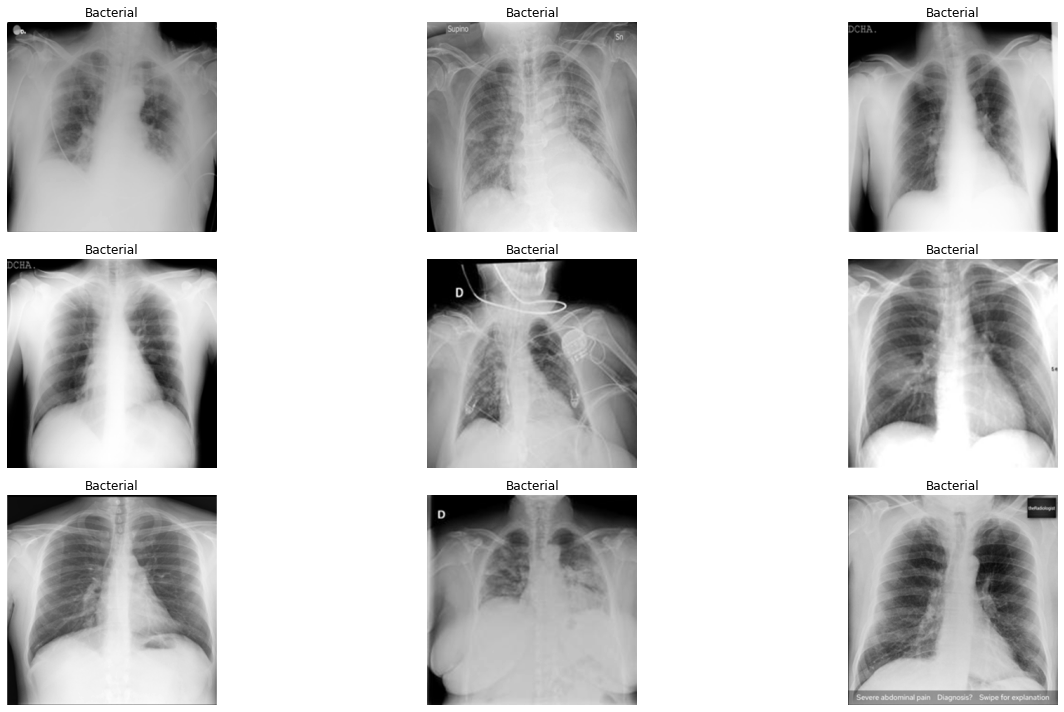

In [9]:
bacterial = os.listdir('../Dataset/masked/COVID-19_Radiography_Dataset/Bacterial/images')
bacterial_dir = '../Dataset/masked/COVID-19_Radiography_Dataset/Bacterial/images'
plt.figure(figsize = (20,10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(bacterial_dir, bacterial[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title("Bacterial")
plt.tight_layout()

# Segmentation

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Define the UNet model
def unet_model(input_size):
    inputs = tf.keras.Input(input_size)

    # Contracting path
    conv1 = layers.Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(inputs)
    conv1 = layers.Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv1)
    pool1 = layers.MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = layers.Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool1)
    conv2 = layers.Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv2)
    pool2 = layers.MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = layers.Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool2)
    conv3 = layers.Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv3)
    pool3 = layers.MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = layers.Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool3)
    conv4 = layers.Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv4)
    drop4 = layers.Dropout(0.5)(conv4)
    pool4 = layers.MaxPooling2D(pool_size=(2, 2))(drop4)

    # Bottom
    conv5 = layers.Conv2D(1024, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool4)
    conv5 = layers.Conv2D(1024, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv5)
    drop5 = layers.Dropout(0.5)(conv5)

    # Expansive path
    up6 = layers.Conv2D(512, 2, activation='relu', padding='same', kernel_initializer='he_normal')(layers.UpSampling2D(size=(2, 2))(drop5))
    merge6 = layers.concatenate([drop4, up6], axis=3)
    conv6 = layers.Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge6)
    conv6 = layers.Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv6)

    up7 = layers.Conv2D(256, 2, activation='relu', padding='same', kernel_initializer='he_normal')(layers.UpSampling2D(size=(2, 2))(conv6))
    merge7 = layers.concatenate([conv3, up7], axis=3)
    conv7 = layers.Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge7)
    conv7 = layers.Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv7)

    up8 = layers.Conv2D(128, 2, activation='relu', padding='same', kernel_initializer='he_normal')(layers.UpSampling2D(size=(2, 2))(conv7))
    merge8 = layers.concatenate([conv2, up8], axis=3)
    conv8 = layers.Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge8)
    conv8 = layers.Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv8)

    up9 = layers.Conv2D(64, 2, activation='relu', padding='same', kernel_initializer='he_normal')(layers.UpSampling2D(size=(2, 2))(conv8))
    merge9 = layers.concatenate([conv1, up9], axis=3)
    conv9 = layers.Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge9)
    conv9 = layers.Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv9)
    conv9 = layers.Conv2D(2, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv9)

    # Output
    output = layers.Conv2D(1, 1, activation='sigmoid')(conv9)

    model = tf.keras.Model(inputs=inputs, outputs=output)

    return model

for filename in os.listdir("../Dataset/chest_xray/sample/covid/"):
    # Load image
    img = cv2.imread(os.path.join("../Dataset/chest_xray/sample/covid/", filename))

    # Check if the image is empty
    img = cv2.resize(img, (256, 256))
    img = np.expand_dims(img, axis=0)
    img = img / 255.0

    model = unet_model(input_size=(256, 256, 3))

# Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    mask = np.zeros((1, 256, 256, 1))
# Train the model
    model.fit(x=img, y=mask, batch_size=1, epochs=5)

# Make the segmentation
    segmentation = model.predict(img)
    # Save binary image
    cv2.imwrite(os.path.join("../Dataset/chest_xray/segmented/", filename), segmentation)

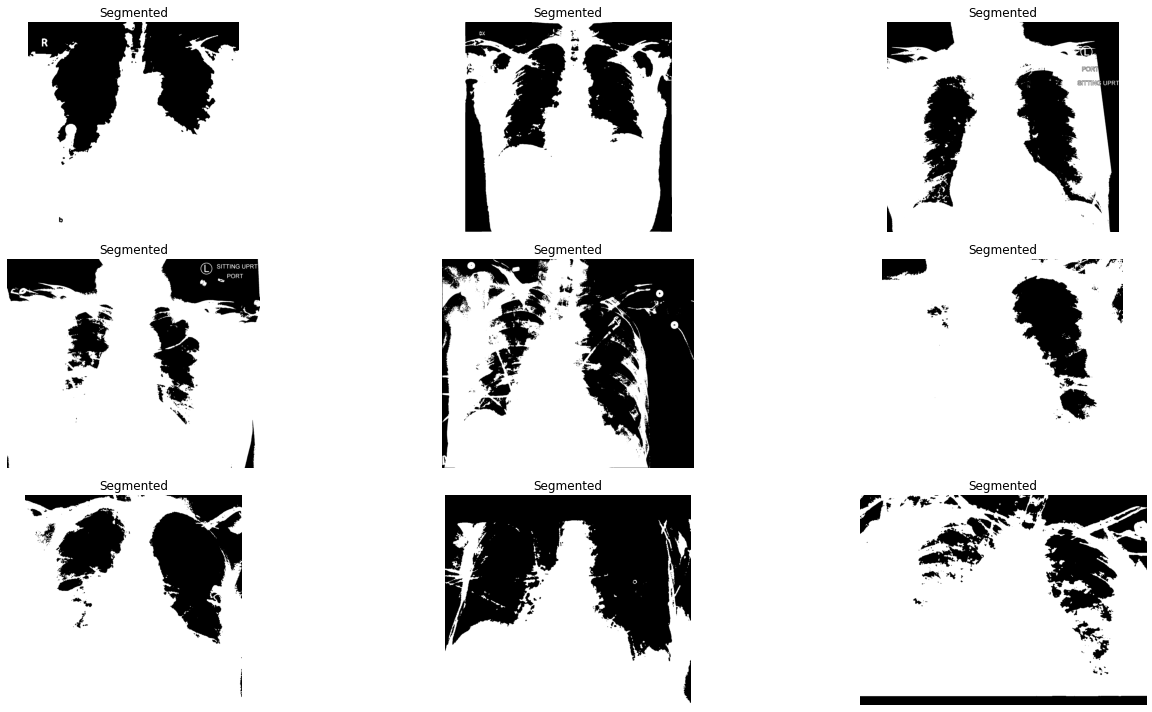

In [12]:

Segmented = os.listdir('../Dataset/masked/COVID-19_Radiography_Dataset/segmented/covid_1/')
Segmented_dir = '../Dataset/masked/COVID-19_Radiography_Dataset/segmented/covid_1/'
plt.figure(figsize = (20,10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(Segmented_dir, Segmented[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title("Segmented")
plt.tight_layout()

The dimensions are 299 pixels height and 299 pixels width
The maximum pixel value is 255.0000
The minimum pixel value is 0.0000
The mean value of the pixels is 85.1897
The standard deviation is 71.2700


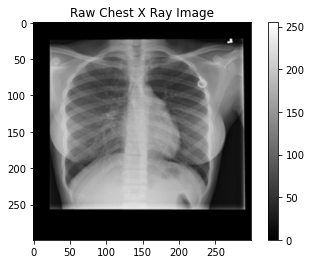

In [11]:
image = cv2.imread('../Dataset/masked/COVID-19_Radiography_Dataset/Healthy/images/Normal-1.png')
plt.imshow(image, cmap='gray')
plt.colorbar()
plt.title('Raw Chest X Ray Image')
print(f"The dimensions are {image.shape[0]} pixels height and {image.shape[1]} pixels width")
print(f"The maximum pixel value is {image.max():.4f}")
print(f"The minimum pixel value is {image.min():.4f}")
mean = image.mean()
std= image.std()
print(f"The mean value of the pixels is {mean:.4f}")
print(f"The standard deviation is {std:.4f}")


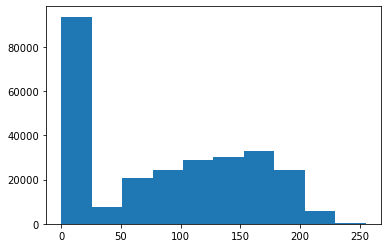

In [12]:
plt.hist(image.ravel())
plt.show()

# Enhance

In [14]:
import os
import cv2

# Set the directory path containing the input images
input_dir_healthy_n = '../Dataset/masked/COVID-19_Radiography_Dataset/Healthy/images'

# Set the directory path where the enhanced images will be saved

output_dir = '../Dataset/masked/COVID-19_Radiography_Dataset/Enhanced/Healthy/'

# Create the output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Create a CLAHE object with desired parameters
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))

# Loop through all images in the input directory
for filename in os.listdir(input_dir_healthy_n):
    if filename.endswith('.jpg') or filename.endswith('.jpeg') or filename.endswith('.png'):
        # Load the image
        img = cv2.imread(os.path.join(input_dir_healthy_n, filename))

        # Convert to grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Apply CLAHE to the grayscale image
        enhanced = clahe.apply(gray)

        # Save the enhanced image to the output directory
        cv2.imwrite(os.path.join(output_dir, filename), enhanced)
        
# Set the directory path containing the input images
input_dir_viral = '../Dataset/masked/COVID-19_Radiography_Dataset/Viral/images'

# Set the directory path where the enhanced images will be saved

output_dir2 = '../Dataset/masked/COVID-19_Radiography_Dataset/Enhanced/Viral/'

# Create the output directory if it doesn't exist
if not os.path.exists(output_dir2):
    os.makedirs(output_dir2)

# Create a CLAHE object with desired parameters
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))

# Loop through all images in the input directory
for filename in os.listdir(input_dir_viral):
    if filename.endswith('.jpg') or filename.endswith('.jpeg') or filename.endswith('.png'):
        # Load the image
        img = cv2.imread(os.path.join(input_dir_viral, filename))

        # Convert to grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Apply CLAHE to the grayscale image
        enhanced = clahe.apply(gray)

        # Save the enhanced image to the output directory
        cv2.imwrite(os.path.join(output_dir2, filename), enhanced)



# Set the directory path containing the input images
input_dir_bacterial_n = '../Dataset/masked/COVID-19_Radiography_Dataset/Bacterial/images'

# Set the directory path where the enhanced images will be saved

output_dir3 = '../Dataset/masked/COVID-19_Radiography_Dataset/Enhanced/Bacterial/'

# Create the output directory if it doesn't exist
if not os.path.exists(output_dir3):
    os.makedirs(output_dir3)

# Create a CLAHE object with desired parameters
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))

# Loop through all images in the input directory
for filename in os.listdir(input_dir_bacterial_n):
    if filename.endswith('.jpg') or filename.endswith('.jpeg') or filename.endswith('.png'):
        # Load the image
        img = cv2.imread(os.path.join(input_dir_bacterial_n, filename))

        # Convert to grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Apply CLAHE to the grayscale image
        enhanced = clahe.apply(gray)

        # Save the enhanced image to the output directory
        cv2.imwrite(os.path.join(output_dir3, filename), enhanced)

In [1]:
import os
import cv2

# Set the directory path containing the input images
input_dir_healthy_n = '../Dataset/masked/COVID-19_Radiography_Dataset/Healthy/masks'

# Set the directory path where the enhanced images will be saved

output_dir = '../Dataset/masked/COVID-19_Radiography_Dataset/Enhanced/Healthy/masks/'

# Create the output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Create a CLAHE object with desired parameters
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))

# Loop through all images in the input directory
for filename in os.listdir(input_dir_healthy_n):
    if filename.endswith('.jpg') or filename.endswith('.jpeg') or filename.endswith('.png'):
        # Load the image
        img = cv2.imread(os.path.join(input_dir_healthy_n, filename))

        # Convert to grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Apply CLAHE to the grayscale image
        enhanced = clahe.apply(gray)

        # Save the enhanced image to the output directory
        cv2.imwrite(os.path.join(output_dir, filename), enhanced)
        
# Set the directory path containing the input images
input_dir_viral = '../Dataset/masked/COVID-19_Radiography_Dataset/Viral/masks'

# Set the directory path where the enhanced images will be saved

output_dir2 = '../Dataset/masked/COVID-19_Radiography_Dataset/Enhanced/Viral/masks/'

# Create the output directory if it doesn't exist
if not os.path.exists(output_dir2):
    os.makedirs(output_dir2)

# Create a CLAHE object with desired parameters
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))

# Loop through all images in the input directory
for filename in os.listdir(input_dir_viral):
    if filename.endswith('.jpg') or filename.endswith('.jpeg') or filename.endswith('.png'):
        # Load the image
        img = cv2.imread(os.path.join(input_dir_viral, filename))

        # Convert to grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Apply CLAHE to the grayscale image
        enhanced = clahe.apply(gray)

        # Save the enhanced image to the output directory
        cv2.imwrite(os.path.join(output_dir2, filename), enhanced)



# Set the directory path containing the input images
input_dir_bacterial_n = '../Dataset/masked/COVID-19_Radiography_Dataset/Bacterial/masks'

# Set the directory path where the enhanced images will be saved

output_dir3 = '../Dataset/masked/COVID-19_Radiography_Dataset/Enhanced/Bacterial/masks/'

# Create the output directory if it doesn't exist
if not os.path.exists(output_dir3):
    os.makedirs(output_dir3)

# Create a CLAHE object with desired parameters
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))

# Loop through all images in the input directory
for filename in os.listdir(input_dir_bacterial_n):
    if filename.endswith('.jpg') or filename.endswith('.jpeg') or filename.endswith('.png'):
        # Load the image
        img = cv2.imread(os.path.join(input_dir_bacterial_n, filename))

        # Convert to grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Apply CLAHE to the grayscale image
        enhanced = clahe.apply(gray)

        # Save the enhanced image to the output directory
        cv2.imwrite(os.path.join(output_dir3, filename), enhanced)

The dimensions are 299 pixels height and 299 pixels width
The maximum pixel value is 255.0000
The minimum pixel value is 2.0000
The mean value of the pixels is 90.6497
The standard deviation is 75.8347


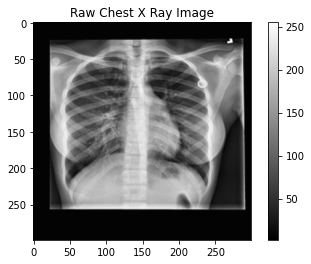

In [13]:
image = cv2.imread('../Dataset/masked/COVID-19_Radiography_Dataset/Enhanced/Healthy/images/Normal-1.png')
plt.imshow(image, cmap='gray')
plt.colorbar()
plt.title('Raw Chest X Ray Image')
print(f"The dimensions are {image.shape[0]} pixels height and {image.shape[1]} pixels width")
print(f"The maximum pixel value is {image.max():.4f}")
print(f"The minimum pixel value is {image.min():.4f}")
mean = image.mean()
std= image.std()
print(f"The mean value of the pixels is {mean:.4f}")
print(f"The standard deviation is {std:.4f}")

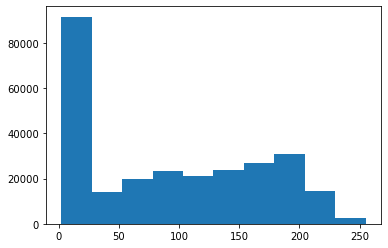

In [14]:
plt.hist(image.ravel())
plt.show()

In [17]:
import os
import cv2
import torch
import torchvision.transforms as transforms
from torchvision import models

# Load pre-trained U-Net model
model = models.segmentation.deeplabv3_resnet50(pretrained=True)
model.eval()

input_folder = "../Dataset/CellData/chest_xray/val/NORMAL/"
output_folder = "../Dataset/CellData/chest_xray/val/segmented_images/"

if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Preprocessing transforms
preprocess = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Iterate through images in input folder
for image_name in os.listdir(input_folder):
    image_path = os.path.join(input_folder, image_name)
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_tensor = preprocess(image).unsqueeze(0)

    # Perform segmentation
    with torch.no_grad():
        output = model(image_tensor)['out']

    # Post-process masks (e.g., thresholding)
    mask = output.argmax(1).squeeze().cpu().numpy()  # Convert to numpy array

    # Save segmented image
    output_mask_path = os.path.join(output_folder, image_name)
    cv2.imwrite(output_mask_path, mask * 255)  # Assuming mask values are in [0, 1]

print("Segmentation and saving complete.")

c:\Users\HP\anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\HP\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DeepLabV3_ResNet50_Weights.COCO_WITH_VOC_LABELS_V1`. You can also use `weights=DeepLabV3_ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Segmentation and saving complete.


In [54]:
import os
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import torch.nn.functional as F
# Define your UNet model and HybridLoss here

class CustomDataset(Dataset):
    def __init__(self, data_folder, mask_folder, transform=None):
        self.data_folder = data_folder
        self.mask_folder = mask_folder
        self.image_names = os.listdir(data_folder)
        self.transform = transform

    def __len__(self):
        return len(self.image_names)

    def __getitem__(self, idx):
        image_name = self.image_names[idx]
        image_path = os.path.join(self.data_folder, image_name)
        mask_path = os.path.join(self.mask_folder, image_name)  # Assuming mask names match image names

        image = Image.open(image_path).convert('RGB')
        mask = Image.open(mask_path).convert('L')  # Convert mask to grayscale

        if self.transform:
            image = self.transform(image)
            mask = self.transform(mask)

        return image, mask


In [55]:

data_folder = "../Dataset/masked/COVID-19_Radiography_Dataset/Bacterial/images/"
mask_folder = "../Dataset/masked/COVID-19_Radiography_Dataset/Bacterial/masks/"
output_folder = "../Dataset/masked/COVID-19_Radiography_Dataset/Segmented/Bacterial/"
batch_size = 3
learning_rate = 0.001
num_epochs = 10

import torch.nn as nn
import torch.optim as optim
from PIL import Image
# Define U-Net architecture
class UNet(nn.Module):
        def __init__(self, in_channels, out_channels):
            super(UNet, self).__init__()
            
            # Encoder
            self.encoder = nn.Sequential(
                nn.Conv2d(in_channels, 64, kernel_size=3, padding=1),
                nn.ReLU(inplace=True),
                nn.Conv2d(64, 64, kernel_size=3, padding=1),
                nn.ReLU(inplace=True),
                nn.MaxPool2d(kernel_size=2, stride=2)
            )
            
            # Decoder
            self.decoder = nn.Sequential(
                nn.ConvTranspose2d(64, 64, kernel_size=2, stride=2),
                nn.ReLU(inplace=True),
                nn.Conv2d(64, 64, kernel_size=3, padding=1),
                nn.ReLU(inplace=True),
                nn.Conv2d(64, out_channels, kernel_size=3, padding=1),
                nn.ReLU(inplace=True)
            )
        def forward(self, x):
            x1 = self.encoder(x)
            x2 = self.decoder(x1)
            return x2

def HybridLoss(outputs, masks):
    # Resize masks to match the output dimensions of the model
    target = F.interpolate(masks, size=outputs.size()[2:], mode='bilinear', align_corners=True)
    
    bce_loss = nn.BCEWithLogitsLoss()(outputs, target)
    
    # Calculate Dice loss
    intersection = (outputs * target).sum(dim=(2, 3))
    union = outputs.sum(dim=(2, 3)) + target.sum(dim=(2, 3))
    dice_loss = 1 - (2 * intersection + 1) / (union + 1)
    
    loss = bce_loss + dice_loss.mean()
    return loss


In [ ]:

transform = transforms.Compose([
    transforms.ToTensor(),
])

dataset = CustomDataset(data_folder, mask_folder, transform)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
in_channels = 3
out_channels = 1
model = UNet(in_channels, out_channels)
#criterion = HybridLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Training loop
for epoch in range(num_epochs):
    for images, masks in dataloader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = HybridLoss(outputs, masks)
        loss.backward()
        optimizer.step()


In [ ]:

# Save all segmented images
with torch.no_grad():
    for i, (images, masks) in enumerate(dataloader):
        outputs = model(images)
        predicted_masks = torch.sigmoid(outputs) > 0.5  # Apply threshold
        predicted_masks_float = predicted_masks.float()  # Convert to float
            
        for j in range(batch_size):
            resized_predicted_mask = F.interpolate(predicted_masks_float[j].unsqueeze(0), size=images.size()[2:], mode='nearest')
            resized_predicted_mask_expanded = resized_predicted_mask.expand(-1, images.size(1), -1, -1)
            masked_image = images[j] * resized_predicted_mask_expanded
            masked_image_path = os.path.join(output_folder, f"masked_{i}_{j}.png")
            torchvision.utils.save_image(masked_image, masked_image_path)

print("Training and saving masked images complete.")

In [ ]:
data_folder2 = "../Dataset/masked/COVID-19_Radiography_Dataset/Healthy/images/"
mask_folder2 = "../Dataset/masked/COVID-19_Radiography_Dataset/Healthy/masks/"
output_folder2 = "../Dataset/masked/COVID-19_Radiography_Dataset/Segmented/Healthy/"
batch_size = 3
learning_rate = 0.001
num_epochs = 10

dataset2 = CustomDataset(data_folder2, mask_folder2, transform)
dataloader2 = DataLoader(dataset2, batch_size=batch_size, shuffle=True)
in_channels = 3
out_channels = 1
model = UNet(in_channels, out_channels)
#criterion = HybridLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

if not os.path.exists(output_folder2):
    os.makedirs(output_folder2)

# Training loop
for epoch in range(num_epochs):
    for images, masks in dataloader2:
        optimizer.zero_grad()
        outputs = model(images)
        loss = HybridLoss(outputs, masks)
        loss.backward()
        optimizer.step()

# Save all segmented images
with torch.no_grad():
    for i, (images, masks) in enumerate(dataloader2):
        outputs = model(images)
        predicted_masks = torch.sigmoid(outputs) > 0.5  # Apply threshold
        predicted_masks_float = predicted_masks.float()  # Convert to float
            
        for j in range(batch_size):
            resized_predicted_mask = F.interpolate(predicted_masks_float[j].unsqueeze(0), size=images.size()[2:], mode='nearest')
            resized_predicted_mask_expanded = resized_predicted_mask.expand(-1, images.size(1), -1, -1)
            masked_image = images[j] * resized_predicted_mask_expanded
            masked_image_path = os.path.join(output_folder2, f"masked_{i}_{j}.png")
            torchvision.utils.save_image(masked_image, masked_image_path)

print("Training and saving masked images complete 1.")


# Viral segmentation

data_folder3 = "../Dataset/masked/COVID-19_Radiography_Dataset/Viral/images/"
mask_folder3 = "../Dataset/masked/COVID-19_Radiography_Dataset/Viral/masks/"
output_folder3 = "../Dataset/masked/COVID-19_Radiography_Dataset/Segmented/Viral/"
batch_size = 3
learning_rate = 0.001
num_epochs = 10

dataset3 = CustomDataset(data_folder3, mask_folder3, transform)
dataloader3 = DataLoader(dataset3, batch_size=batch_size, shuffle=True)
in_channels = 3
out_channels = 1
model = UNet(in_channels, out_channels)
#criterion = HybridLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

if not os.path.exists(output_folder3):
    os.makedirs(output_folder3)

# Training loop
for epoch in range(num_epochs):
    for images, masks in dataloader3:
        optimizer.zero_grad()
        outputs = model(images)
        loss = HybridLoss(outputs, masks)
        loss.backward()
        optimizer.step()

# Save all segmented images
with torch.no_grad():
    for i, (images, masks) in enumerate(dataloader3):
        outputs = model(images)
        predicted_masks = torch.sigmoid(outputs) > 0.5  # Apply threshold
        predicted_masks_float = predicted_masks.float()  # Convert to float
            
        for j in range(batch_size):
            resized_predicted_mask = F.interpolate(predicted_masks_float[j].unsqueeze(0), size=images.size()[2:], mode='nearest')
            resized_predicted_mask_expanded = resized_predicted_mask.expand(-1, images.size(1), -1, -1)
            masked_image = images[j] * resized_predicted_mask_expanded
            masked_image_path = os.path.join(output_folder3, f"masked_{i}_{j}.png")
            torchvision.utils.save_image(masked_image, masked_image_path)

print("Training and saving masked images complete 3.")

In [46]:
import torch
import torch.nn as nn

# Define the encoder and decoder blocks
class ConvBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(ConvBlock, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.LeakyReLU(negative_slope=0.1, inplace=True),
            nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.LeakyReLU(negative_slope=0.1, inplace=True)
        )

    def forward(self, x):
        return self.conv(x)

class UNet(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(UNet, self).__init__()
        # Encoder
        self.encoder_blocks = nn.ModuleList([
            ConvBlock(in_channels, 64),
            ConvBlock(64, 128),
            ConvBlock(128, 256),
            ConvBlock(256, 512),
            ConvBlock(512, 1024)
        ])
       
        # Decoder
        self.decoder_blocks = nn.ModuleList([
            ConvBlock(1024, 512),
            ConvBlock(512, 256),
            ConvBlock(256, 128),
            ConvBlock(128, 64),
            ConvBlock(64, out_channels)
        ])
       
        # Upsampling
        self.upsample = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)

    def forward(self, x):
        skip_connections = []
       
        # Encoder
        for block in self.encoder_blocks:
            x = block(x)
            skip_connections.append(x)
            x = nn.MaxPool2d(kernel_size=2)(x)
       
        # Decoder
        for i, block in enumerate(self.decoder_blocks):
            x = self.upsample(x)
            x = torch.cat([x, skip_connections[-(i + 1)]], dim=1)
            x = block(x)
       
        return x
    

# Instantiate the model
in_channels = 3  # Number of input channels (e.g., for RGB images)
out_channels = 1  # Number of output channels (e.g., for segmentation mask)
model = UNet(in_channels, out_channels)

# Print model summary
print(model)

UNet(
  (encoder_blocks): ModuleList(
    (0): ConvBlock(
      (conv): Sequential(
        (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): LeakyReLU(negative_slope=0.1, inplace=True)
        (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (5): LeakyReLU(negative_slope=0.1, inplace=True)
      )
    )
    (1): ConvBlock(
      (conv): Sequential(
        (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): LeakyReLU(negative_slope=0.1, inplace=True)
        (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats

# Classification

In [ ]:
# import h5py

# # features_file = h5py.File('./Bacteria', 'r')
# extracted_features = features_file['extracted_features'][:]  # Adjust the dataset name as needed
# features_file.close()

import torch
import torch.nn as nn
from torchvision.models import vgg16

num_classes = 3  # Change this to your number of output classes

vgg_model = vgg16(pretrained=True)
vgg_model.classifier[6] = nn.Linear(4096, num_classes)  # Modify the last layer

import numpy as np

def classify_features(model, features):
    with torch.no_grad():
        features_tensor = torch.tensor(features, dtype=torch.float32)
        predictions = model(features_tensor)
    predicted_class = np.argmax(predictions.numpy(), axis=1)
    return predicted_class

from PIL import Image
import torchvision.transforms as transforms

def preprocess_image(image_path):
    img = Image.open(image_path).convert("RGB")
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    preprocessed_img = transform(img)
    return preprocessed_img

input_image_path = '../Dataset/chest_xray/segmented/16654_2_1.jpg'
preprocessed_img = preprocess_image(input_image_path)
model.summary()

In [ ]:

# Pass the preprocessed image through the VGG16 model
vgg_model.eval()
with torch.no_grad():
    output = vgg_model(preprocessed_img.unsqueeze(0))

predicted_class = np.argmax(output.numpy())
print("Predicted Class:", predicted_class)